# Directional factor for LASSO 

In this note, we aim to visualize the redidual set $R = \{r_x = b- Ax: [x]\geq 1\}$ in the context of LASSO problem 

$$\min_{x}\quad P(x) = \frac{1}{2}||b-Ax||^2_2+\lambda||x||_1$$
where $x\in \mathbb R^n$, $b\in \mathbb R^m$, $A \in \mathbb R^{m\times n}$ and $\lambda>0$. 
Here $[x]$ is called the directional factor $x$ defined as  
$$[x] = \arg\min_{t\geq 0} P(tx) = \frac{\langle Ax, b\rangle - \lambda||x||_1}{||Ax||^2}.$$

Recallthat the dual problem of LASSO is the closest point projection  $$\min_{u\in U} ||b-u||_2$$ where $U= \{u\in \mathbb R^m:|A^Tu|\leq \lambda \}$ is called the dual feasible set. 

In [75]:
import numpy as np
import matplotlib.pyplot as plt

def dic(x, t, w):
    diff = x.reshape(-1, 1) - t.reshape(1, -1) 
    g = np.power(2, -diff**2/w**2)
    norms = np.linalg.norm(g, axis=0) 
    return g/norms

def get_setup():
	np.random.seed(124)
	# Generate random A matrix of size mxn
	m, n = 30, 40 
	x_range = np.linspace(0., 1., m)
	t_range = np.linspace(0., 1., n)

	# A = np.random.rand(m, n)
	A = dic(x_range, t_range, w=0.08)

	# Generate random x0 vector of size n
	indices = [n//10, 7*(n//10)]
	x0 = np.zeros(n)
	x0[indices] = [0.4, 0.6]

	# Compute b vector such that Ax0 = b
	b = np.dot(A, x0) + 0.05*np.random.rand(m)

	# define parameters and 
	lbd_max = np.max(np.dot(A.T, b))
	lbd = 0.1 * lbd_max  # Regularization parameter
	# rho = 0.1  # Penalty parameter
	# print(rho, lmbda)
	# max_iter = 1000
	data = {
        "x_range": x_range,
		 "t_range": t_range,
         "b": b, 
         "A": A,
         "lbd": lbd, 
         "x0": x0      
	}
	return data

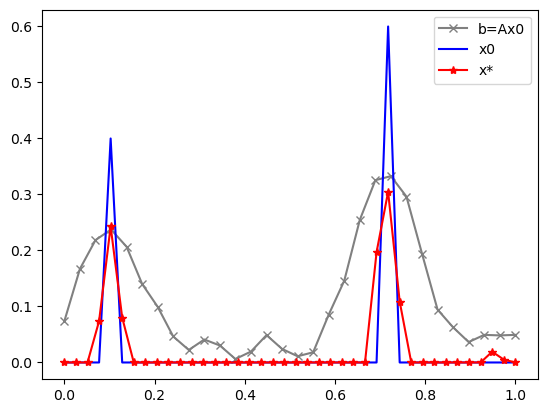

In [76]:
def ista(A, b, lbd, max_iters=100):
    # print(A.shape, b.shape)
    _, s, _ = np.linalg.svd(A)
    L = s.max()**2 
    x = np.zeros(A.shape[1])
    x_list = []
    for i in range(max_iters):
        x = x + (1/L) * A.T @ (b- A @ x) 
        x = (x - lbd/L).clip(min=0.) 
        x_list += [x]
    # print(x.shape)
    x_list = np.vstack(x_list)
    return x_list

data  = get_setup()
A = data["A"]
b = data["b"]
lbd = data["lbd"]
x0 = data["x0"]
x_range = data["x_range"]
t_range = data["t_range"]
x_list = ista(A, b, lbd, max_iters=1000)
x_opt = x_list[-1]
plt.plot(x_range, b, color="gray", label="b=Ax0", marker="x")
plt.plot(t_range, x0, color="blue", label="x0")
plt.plot(t_range, x_opt, color="red", label="x*", marker="*")
plt.legend()
plt.show()

(20, 40)


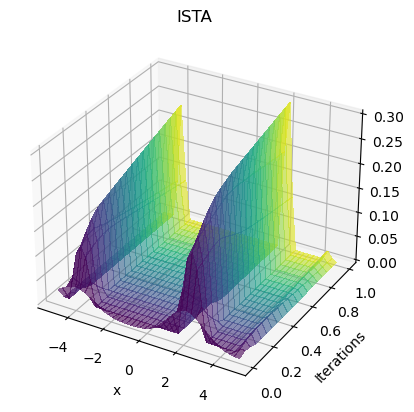

In [77]:


# Generate x and y values
k, n = x_list.shape
N=50
k = k//N
x = np.linspace(-5, 5, n)
y = np.linspace(0, 1, k)
X, Y = np.meshgrid(x, y)

# Compute the corresponding z values
iters = np.arange(k)*N
Z = x_list[iters, :]
print(Z.shape)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap='viridis', cstride=1, rstride=1,
                       linewidth=0, antialiased=False, facecolors=plt.cm.viridis(Y), alpha=0.6)

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('Iterations')
ax.set_title('ISTA')
plt.show()

x_list=(20, 5)


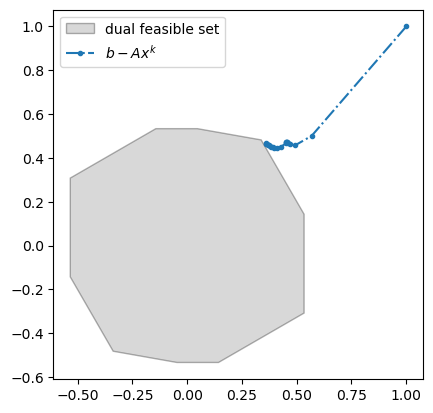

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pypoman
from scipy.spatial import ConvexHull

def dic(x, t, w):
    diff = x.reshape(-1, 1) - t.reshape(1, -1) 
    g = np.power(2, -diff**2/w**2)
    norms = np.linalg.norm(g, axis=0) 
    return g/norms

def get_atom(angle):
    return np.array([np.cos(angle), np.sin(angle)])

def get_setup():
	np.random.seed(124)
	# Generate random A matrix of size mxn
	degrees = np.array([0, 30, 80, 90, 120])
	# degrees = np.array([0, 90, 120])
        
	radians = degrees * np.pi /180
	atoms = [get_atom(alpha) for alpha in radians]

	# A = np.random.rand(m, n)
	A = np.vstack(atoms).T
	m, n = A.shape
	# print(A.shape)

	# Generate random x0 vector of size n
	k = np.random.choice(np.arange(n), 3)
	x0 = np.zeros(n)
	x0[k] = np.random.rand(3)

	# Compute b vector such that Ax0 = b
	b = np.dot(A, x0) #+ 0.05*np.random.rand(m)

	# define parameters and 
	lbd_max = np.max(np.dot(A.T, b))
	lbd = 0.5 * lbd_max 
	data = {
        "x_range": x_range,
		 "t_range": t_range,
         "b": b, 
         "A": A,
         "lbd": lbd, 
         "x0": x0      
	}
	return data

data  = get_setup()
A = data["A"]
b = data["b"]
lbd = data["lbd"]
x0 = data["x0"]
# print(A)
b = np.array([1,1])

x_list = ista(A, b, lbd, max_iters=20)
print(f"x_list={x_list.shape}")
r_list = b.reshape(2, 1) - A @ x_list.T
r_list = np.hstack([b.reshape(2, 1), r_list])
# print(r_list.shape)

def plot_feasible(A, b, lbd):
	matrix = np.hstack([A, -A]).T
	bound = np.ones(matrix.shape[0])*lbd
	vertices = pypoman.compute_polytope_vertices(matrix, bound)
	vertices = np.vstack(vertices) # shape (n, 2)
	indices = ConvexHull(vertices).vertices
	vertices = vertices[indices, :]

	plt.fill(vertices[:, 0], vertices[:, 1], color="gray",
			alpha=0.3, edgecolor='black', linewidth=1,
			label="dual feasible set")
    
plot_feasible(A, b, lbd)
plt.plot(r_list[0], r_list[1], ls="-.", marker=".", label="$b-Ax^k$")
plt.legend()
plt.axis('scaled')
plt.show()



In [79]:
x_list.shape

(20, 5)

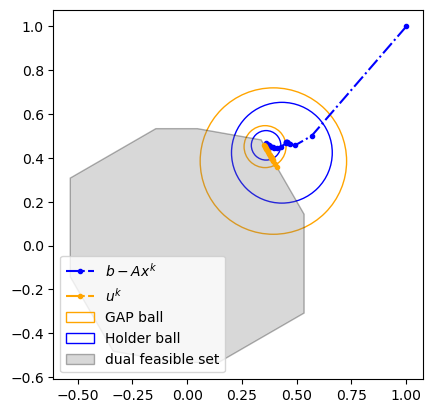

In [80]:
max_cert_list = np.abs(A.T @ r_list).max(axis=0)
# print(max_cert_list.shape, r_list.shape)
u_list  = r_list * (lbd/max_cert_list)

def dual_gap(A, b, lbd, x):
    r = b-A @ x 
    lbd_r = np.abs(A.T @ r).max()
    u = (lbd/lbd_r)*r 
    p = 0.5 * np.linalg.norm(r)**2 + lbd * np.abs(x).sum()
    d = 0.5 * np.linalg.norm(b)**2 - 0.5 * np.linalg.norm(b- u)**2
    return np.abs(p-d)


def plot_ball(k, label=[None, None]):
    # if label is None:
	center = u_list[:, k]
	radius = np.sqrt(2* dual_gap(A, b, lbd, x_list.T[:, k]))
	circle = plt.Circle(center, radius, label=label[0], edgecolor='orange', facecolor='none')
	ax.add_patch(circle)

	center = 0.5*(u_list[:, k] + r_list[:, k])
	radius = np.sqrt(np.abs(dual_gap(A, b, lbd, x_list.T[:, k]) - 0.25 *np.linalg.norm(u_list[:, k] - r_list[:, k])**2))
	circle = plt.Circle(center, radius, label=label[1], edgecolor='blue', facecolor='none')
	ax.add_patch(circle)

fig, ax = plt.subplots()
plt.plot(r_list[0], r_list[1], color="blue", ls="-.", marker=".", label="$b-Ax^k$")
plt.plot(u_list[0], u_list[1], color="orange", ls="-.", marker=".", label="$u^k$")
plot_ball(k=18, label=["GAP ball", "Holder ball"])
plot_ball(k=3)
plot_feasible(A, b, lbd)

plt.legend()
plt.axis('scaled')
plt.show()

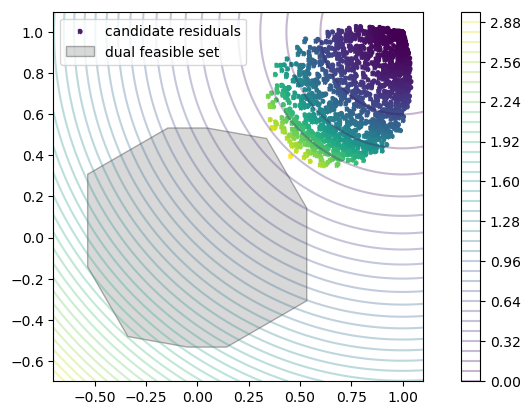

In [81]:
m, n = A.shape 
np.random.seed(123)
x_rand = np.random.randn(n, 8000)
# print(x_rand.shape)

def directional_factor(A, b, lbd, x):
    # print(A.shape, x.shape)
    a = np.sum((A @ x) * b) - lbd * np.abs(x).sum()
    b = np.linalg.norm(A@x)**2
    return a/b

x = np.linspace(-0.7, 1.1, 100)
y = np.linspace(-0.7, 1.1, 100)
X, Y = np.meshgrid(x, y)
Z = 0.5 * ((b[0] - X)**2 + (b[1]-Y)**2)

x_rand_list =[x_rand[:, i] for i in range(x_rand.shape[1])]
factors = np.array([directional_factor(A, b, lbd, x) for x in x_rand_list])
# x_rand  = factors * x_rand
greater_than_zero = factors >0
x_rand = x_rand[:, greater_than_zero]
factors = factors[greater_than_zero]
# plt.plot(factors)
# plt.show()


r_rand = b.reshape(2, 1) - A @ x_rand
r_cand = b.reshape(2, 1) - A @ (x_rand*factors)
values = 0.5*np.linalg.norm(A@ (x_rand*factors), axis=0)**2

# plt.scatter(r_rand[0], r_rand[1], color="blue", ls="-.", marker=".", label="$r$")
plt.scatter(r_cand[0], r_cand[1], c=values, ls="-.", marker=".", label="candidate residuals")
cbar = plt.contour(X, Y, Z, levels=40, alpha = 0.3)
plot_feasible(A, b, lbd)

plt.colorbar(cbar)
plt.legend()
plt.axis('scaled')
plt.show()


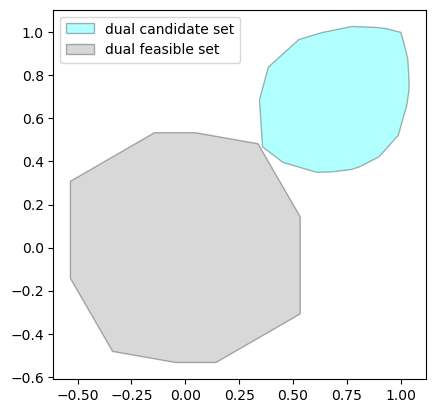

In [82]:
vertices = np.hstack([r_cand, r_list[:, [-1]]]).T
r_indices = ConvexHull(vertices).vertices
vertices = vertices[r_indices, :]

plt.fill(vertices[:, 0], vertices[:, 1], color="cyan",
			alpha=0.3, edgecolor='black', linewidth=1,
			label="dual candidate set")
# plt.scatter(r_cand[0], r_cand[1], c=values, ls="-.", marker=".", alpha=0.3)
# cbar = plt.contour(X, Y, Z, levels=40, alpha = 0.3)
# plt.colorbar(cbar)

plot_feasible(A, b, lbd)

plt.legend()
plt.axis('scaled')
plt.show()

In [85]:
def dual_prox(b, p, sigma):
	return (p - sigma*b )/ (1+sigma)

def primal_prox(z, lbd, tau):
	return np.sign(z) * np.maximum(np.abs(z) - lbd*tau, 0.)

#https://odl.readthedocs.io/math/solvers/nonsmooth/chambolle_pock.html
def lasso_chambolle_pock(A, b, lbd, max_iters=100):
	# 
	x0 = np.zeros(A.shape[1])
	u0 = np.zeros(A.shape[0])
	lip = np.sqrt((A**2).sum())
	sigma = 0.5/lip
	tau = 0.5/lip
	theta=1

	x = x0.copy()
	u = u0.copy()
	xbar = x0.copy()
	x_list = []
	u_list = []

	for i in range(max_iters):
		xpre = x.copy()
		u = dual_prox(b, p= u + sigma * A @ xbar, sigma=sigma)
		x = primal_prox(z= xpre - tau * A.T @ u, lbd=lbd, tau=tau)
		xbar = x + theta * (x-xpre)
		# print(i, A.shape, x.shape, u.shape)

		x_list += [x]
		u_list += [u]
	return x_list, u_list


x_list, u_list = lasso_chambolle_pock(A, b, lbd, max_iters=100)

# print(x_list[-1])


(2, 5) (5, 100) (2,)
(2, 100)


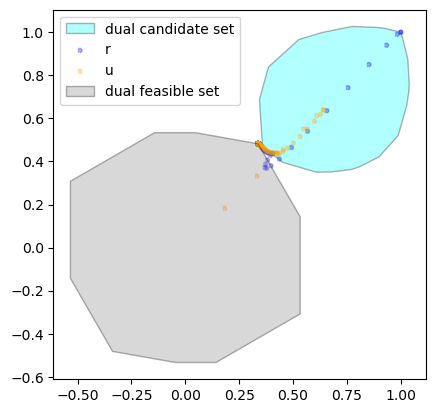

In [86]:
vertices = np.hstack([r_cand, r_list[:, [-1]]]).T
r_indices = ConvexHull(vertices).vertices
vertices = vertices[r_indices, :]


# print(x_list[-1])

K = -10
x_array = np.vstack(x_list).T
print(A.shape, x_array.shape, b.shape)
r_array = b.reshape(2, 1) - A @ x_array

# lbd_r = np.abs(A.T @ r_array).max(axis=0)
# print("lbd_r", lbd_r.shape)
# ur_array = r_array * (lbd/lbd_r)
# r_array = r_array
u_array = - np.vstack(u_list).T
print(u_array.shape)

plt.fill(vertices[:, 0], vertices[:, 1], color="cyan",
			alpha=0.3, edgecolor='black', linewidth=1,
			label="dual candidate set")
plt.scatter(r_array[0], r_array[1], c="blue", label="r", ls="-.", marker=".", alpha=0.3)
plt.scatter(u_array[0], u_array[1], c="orange", label="u", ls="-.", marker=".", alpha=0.3)
# plt.scatter(ur_array[0], ur_array[1], c="red", label="ur", ls="-.", marker=".", alpha=0.3)

# cbar = plt.contour(X, Y, Z, levels=40, alpha = 0.3)
# plt.colorbar(cbar)

plot_feasible(A, b, lbd)

plt.legend()
plt.axis('scaled')
plt.show() 